In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
import math
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('rumah123_yogya_unfiltered.csv')
df.head()

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
0,"Rp 1,79 Miliar",https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120 m²,110 m²
1,Rp 170 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102 m²,126 m²
2,Rp 695 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100 m²,100 m²
3,Rp 560 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109 m²,67 m²
4,Rp 200 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60 m²,30 m²


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2020 non-null   object 
 1   nav-link          2020 non-null   object 
 2   description       2020 non-null   object 
 3   listing-location  2020 non-null   object 
 4   bed               2001 non-null   float64
 5   bath              1999 non-null   float64
 6   carport           1713 non-null   float64
 7   surface_area      2019 non-null   object 
 8   building_area     2019 non-null   object 
dtypes: float64(3), object(6)
memory usage: 142.2+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()


price                 0
nav-link              0
description           0
listing-location      0
bed                  19
bath                 21
carport             307
surface_area          1
building_area         1
dtype: int64

In [6]:
df1 = df.dropna(subset=['surface_area', 'building_area'])
df1.isna().sum()

price                 0
nav-link              0
description           0
listing-location      0
bed                  19
bath                 21
carport             306
surface_area          0
building_area         0
dtype: int64

Melakukan formatting data

In [7]:
def format_price(price_str):
  if pd.isnull(price_str):
    return None

  price_str = price_str.replace(',', '.').replace('Rp', '').strip()
  if 'Juta' in price_str:
    price_num = float(price_str.replace('Juta', '').strip()) * 1000000
  elif 'Miliar' in price_str:
    price_num = float(price_str.replace('Miliar', '').strip()) * 1000000000
  else:
    try:
      price_num = int(float(price_str))
    except ValueError:
      return None

  return int(price_num)

df2 = df1.copy()

df2['price'] = df1['price'].apply(format_price)

df2.head()

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
0,1790000000,https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120 m²,110 m²
1,170000000,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102 m²,126 m²
2,695000000,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100 m²,100 m²
3,560000000,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109 m²,67 m²
4,200000000,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60 m²,30 m²


In [8]:
def format_area(area_str):
  try:
    area_str = str(area_str).replace('m²', '').strip()
    return int(area_str)
  except (ValueError, TypeError):
    return None

df3 = df1.copy()

df3['surface_area'] = df3['surface_area'].apply(format_area)
df3['building_area'] = df3['building_area'].apply(format_area)

df3.head()

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
0,"Rp 1,79 Miliar",https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120,110
1,Rp 170 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102,126
2,Rp 695 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100,100
3,Rp 560 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109,67
4,Rp 200 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60,30


In [9]:
df4 = pd.DataFrame({
    'price': df2['price'],
    'building_area': df3['building_area']
})

df4_name = ['price', 'building_area']

df4.head()

,price,building_area
0,1790000000,110
1,170000000,126
2,695000000,100
3,560000000,67
4,200000000,30


In [10]:
outliers_index = []

for column in df4_name:
    Q1 = df4[column].quantile(0.25)
    Q3 = df4[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df4[(df4[column] < lower_bound) | (df4[column] > upper_bound)]

    for idx in outliers.index:
        if idx not in outliers_index:
            outliers_index.append(idx)

    print(f"Number of outliers in {column}: {len(outliers)}")

Number of outliers in price: 155
Number of outliers in building_area: 167


In [11]:
df4 = df4.drop(outliers_index)
df4.describe()

,price,building_area
count,1.801000e+03,1801.000000
mean,1.253516e+09,106.305941
std,8.770189e+08,60.974441
min,6.900000e+07,4.000000
25%,5.920000e+08,60.000000
50%,8.970000e+08,90.000000
75%,1.800000e+09,140.000000
max,4.300000e+09,302.000000


In [12]:
for name in df4_name:
        print(f"Data for {name}:")
        print(df4[name])
        print(df4[name].describe())

Data for price:
0       1790000000
1        170000000
2        695000000
3        560000000
4        200000000
           ...    
2015     500000000
2016     750000000
2017     756000000
2018    1780000000
2019    2300000000
Name: price, Length: 1801, dtype: int64
count    1.801000e+03
mean     1.253516e+09
std      8.770189e+08
min      6.900000e+07
25%      5.920000e+08
50%      8.970000e+08
75%      1.800000e+09
max      4.300000e+09
Name: price, dtype: float64
Data for building_area:
0       110
1       126
2       100
3        67
4        30
       ... 
2015     80
2016     60
2017     60
2018    160
2019    180
Name: building_area, Length: 1801, dtype: int64
count    1801.000000
mean      106.305941
std        60.974441
min         4.000000
25%        60.000000
50%        90.000000
75%       140.000000
max       302.000000
Name: building_area, dtype: float64


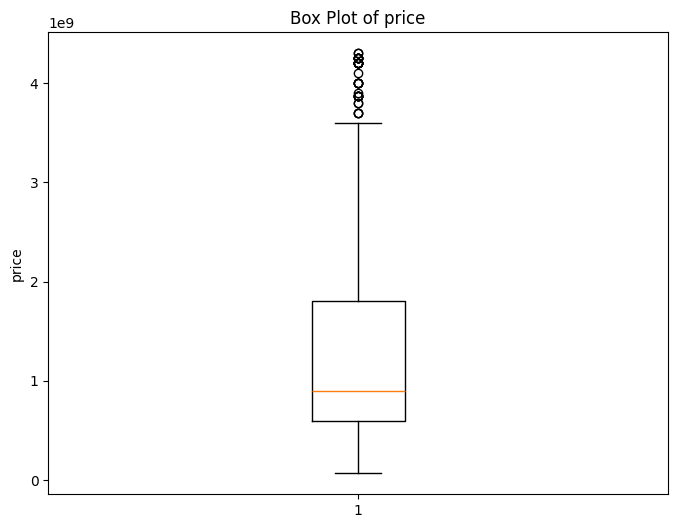

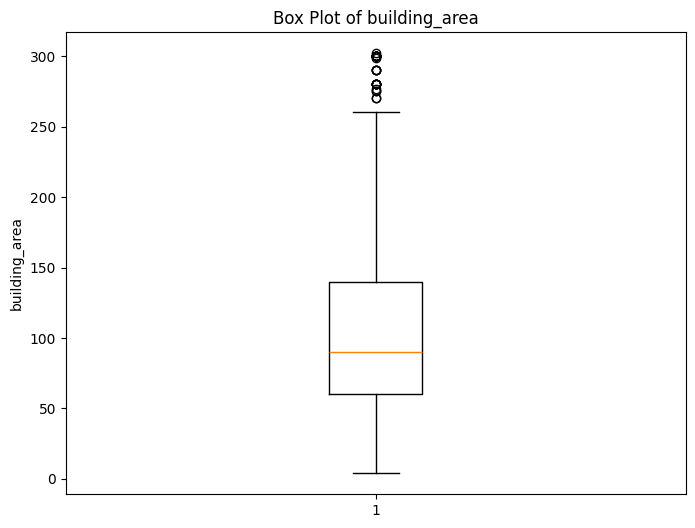

In [13]:
for name in df4_name:
  plt.figure(figsize=(8, 6))
  plt.boxplot(df4[name].dropna())
  plt.title(f'Box Plot of {name}')
  plt.ylabel(name)
  plt.show()

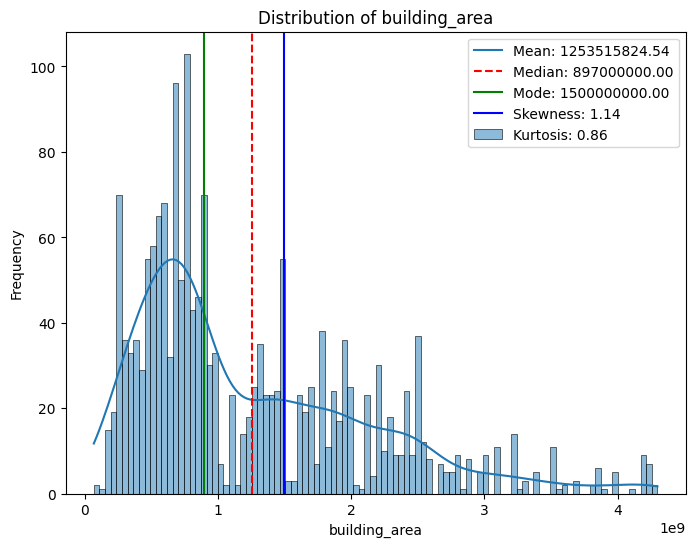

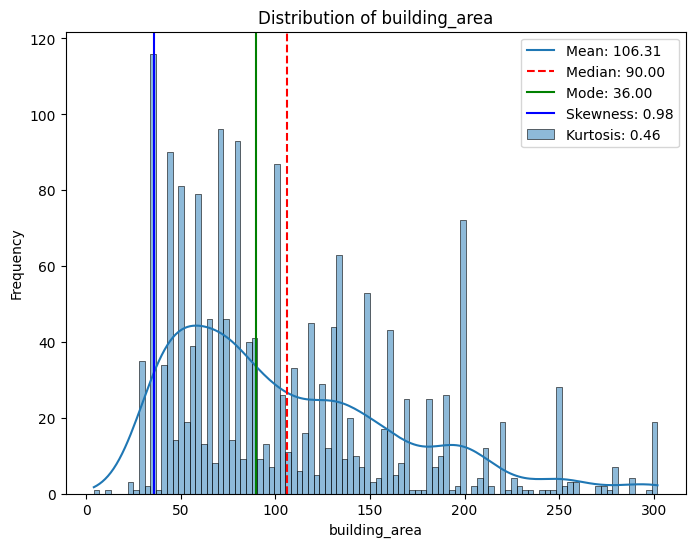

In [14]:
for name in df4_name:
  plt.figure(figsize=(8, 6))
  sns.histplot(df4[name], kde=True, bins=100)

  mean_value = df4[name].mean()
  median_value = df4[name].median()
  mode_value = df4[name].mode()[0]

  plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
  plt.axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')
  plt.axvline(mode_value, color='b', linestyle='-', label=f'Mode: {mode_value:.2f}')

  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')

  column_skewness = skew(df4[name].dropna())
  column_kurtosis = kurtosis(df4[name].dropna())

  plt.legend([
      f"Mean: {mean_value:.2f}",
      f"Median: {median_value:.2f}",
      f"Mode: {mode_value:.2f}",
      f"Skewness: {column_skewness:.2f}",
      f"Kurtosis: {column_kurtosis:.2f}"
  ])

  plt.show()

In [15]:
# df4.to_csv('cleaned.csv', index=False)

In [16]:
df4.isna().sum() #debuging krn td di excel cell atas ada data kosong

price            0
building_area    0
dtype: int64

In [17]:
X = df4['building_area'].to_numpy()
Y = df4['price'].to_numpy()


In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1440,)
(1440,)
(361,)
(361,)


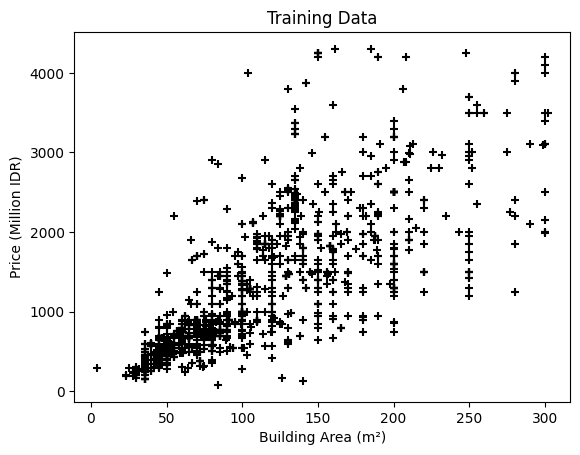

In [19]:
plt.scatter(x_train, y_train / 1_000_000, marker='+', color='black')
plt.title('Training Data')
plt.xlabel('Building Area (m²)')
plt.ylabel('Price (Million IDR)')
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

models = {
    'linear': LinearRegression(),
    'tree': DecisionTreeRegressor(random_state=42),
    'gboost': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'forest': RandomForestRegressor(n_estimators=100, random_state=42),
}

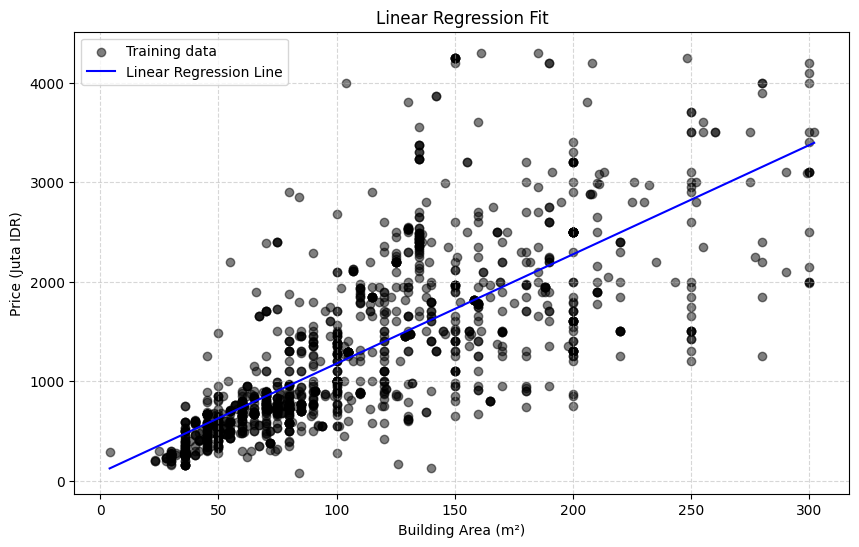

In [36]:
lin_model = models['linear']
lin_model.fit(x_train.reshape(-1, 1), y_train)

plt.figure(figsize=(10,6))
plt.scatter(x_train, y_train / 1_000_000, color='black', label='Training data', alpha=0.5)

x_line = np.linspace(min(x_train), max(x_train), 100).reshape(-1,1)
y_line = lin_model.predict(x_line) / 1_000_000

plt.plot(x_line, y_line, color='blue', label='Linear Regression Line')
plt.title('Linear Regression Fit')
plt.xlabel('Building Area (m²)')
plt.ylabel('Price (Juta IDR)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
x_train_reshaped = x_train.reshape(-1, 1)
x_test_reshaped = x_test.reshape(-1, 1)

In [37]:
from sklearn.metrics import r2_score

print("Evaluasi Model")
for name, model in models.items():
    y_train_pred = model.predict(x_train_reshaped)
    y_test_pred = model.predict(x_test_reshaped)


    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"Model: {name}")
    print(f"Train R²  : {train_r2:.4f}")
    print(f"Test R²   : {test_r2:.4f}\n")


Evaluasi Model
Model: linear
Train R²  : 0.5866
Test R²   : 0.5116

Model: tree
Train R²  : 0.7261
Test R²   : 0.5964

Model: gboost
Train R²  : 0.7034
Test R²   : 0.6071

Model: forest
Train R²  : 0.7216
Test R²   : 0.6149



Model: linear
Luas bangunan: 200.0 m²
Perkiraan harga: Rp 2,274,988,222

Model: tree
Luas bangunan: 200.0 m²
Perkiraan harga: Rp 2,010,950,000

Model: gboost
Luas bangunan: 200.0 m²
Perkiraan harga: Rp 2,038,517,848

Model: forest
Luas bangunan: 200.0 m²
Perkiraan harga: Rp 2,009,236,761



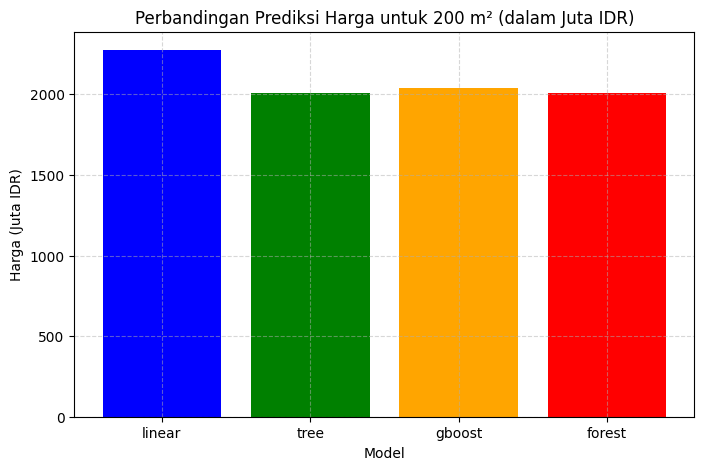

In [40]:

x_train_reshaped = x_train.reshape(-1, 1)
x_test_reshaped = x_test.reshape(-1, 1)

for name, model in models.items():
    model.fit(x_train_reshaped, y_train)

def predict_price(model_name, building_area):
    if model_name not in models:
        print(f"Model '{model_name}' tidak ditemukan. Pilih dari: {list(models.keys())}")
        return None

    model = models[model_name]
    input_area = float(building_area)
    prediction = model.predict([[input_area]])

    print(f"Model: {model_name}")
    print(f"Luas bangunan: {input_area} m²")
    print(f"Perkiraan harga: Rp {prediction[0]:,.0f}\n")
    return prediction[0]

def compare_models(building_area):
    predictions = {}
    for name in models:
        pred = predict_price(name, building_area)
        predictions[name] = pred

    plt.figure(figsize=(8,5))
    plt.bar(predictions.keys(), [p/1_000_000 for p in predictions.values()], color=['blue','green','orange','red'])
    plt.title(f'Perbandingan Prediksi Harga untuk {building_area} m² (dalam Juta IDR)')
    plt.ylabel('Harga (Juta IDR)')
    plt.xlabel('Model')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

building_area = 200

compare_models(building_area)



In [34]:
predict_price('gboost', 150)

Model: gboost
Luas bangunan: 150.0 m²
Perkiraan harga: Rp 1,958,070,945



1958070945.3080933

In [35]:
import joblib
joblib.dump(models['linear'], 'linear_model.pkl')
joblib.dump(models['tree'], 'tree_model.pkl')
joblib.dump(models['gboost'], 'gboost_model.pkl')
joblib.dump(models['forest'], 'forest_model.pkl') 

['forest_model.pkl']

In [ ]:
# catatan 

# Model: tree
# Luas bangunan: 1000.0 m²
# Perkiraan harga: Rp 3,500,000,000
# Model: forest
# Luas bangunan: 1000.0 m²
# Perkiraan harga: Rp 3,330,503,241
# mentok karena datanya dikit


# evalusi model normal utk data sederhana
# properti milaran masih wajar